In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
csv_test = pd.read_csv('/Users/kimginam/ML/Melbourne_housing_FULL.csv')
df = csv_test
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df['Rooms'].value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

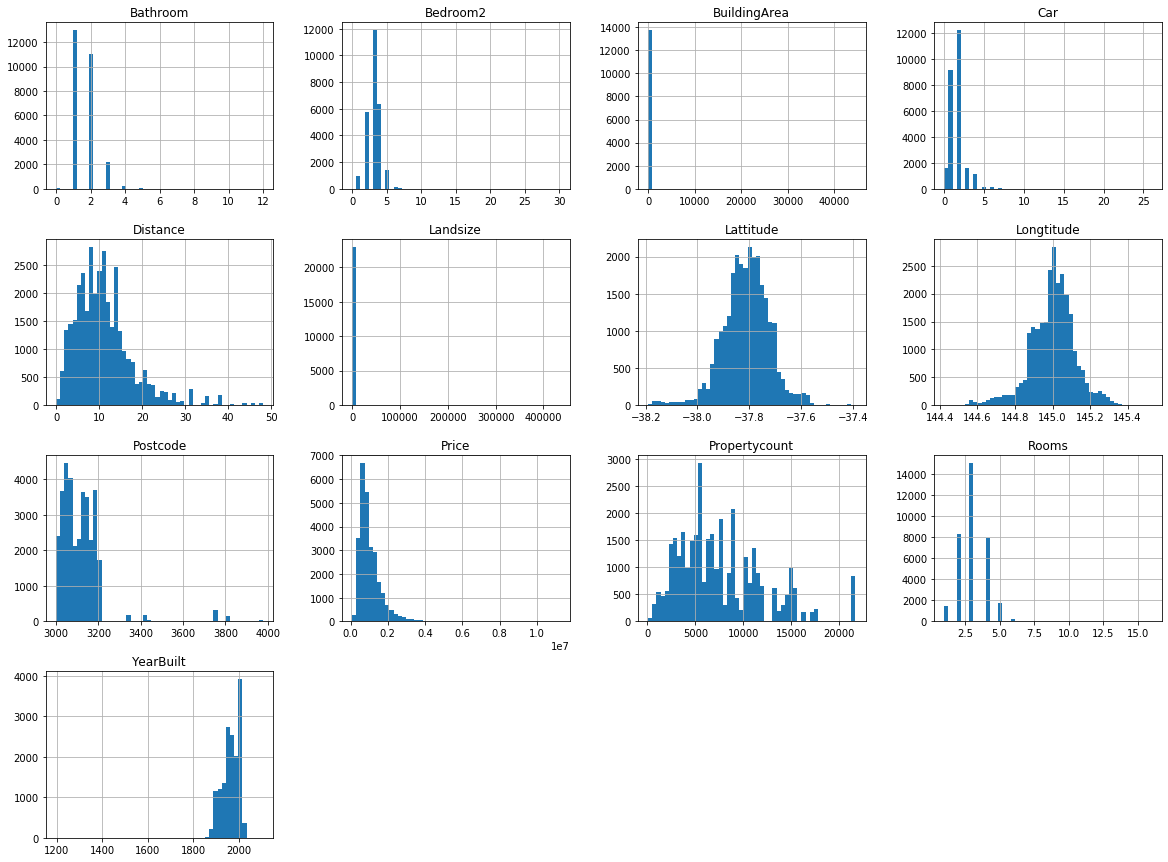

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1)

In [8]:
print(len(train_set), "train +", len(test_set), "test")

31371 train + 3486 test


In [9]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
train_set['Price'].value_counts()

1100000.0    214
600000.0     212
650000.0     203
800000.0     194
1300000.0    190
            ... 
1213000.0      1
2295000.0      1
378000.0       1
901500.0       1
902500.0       1
Name: Price, Length: 2758, dtype: int64

In [11]:
df = train_set.copy()

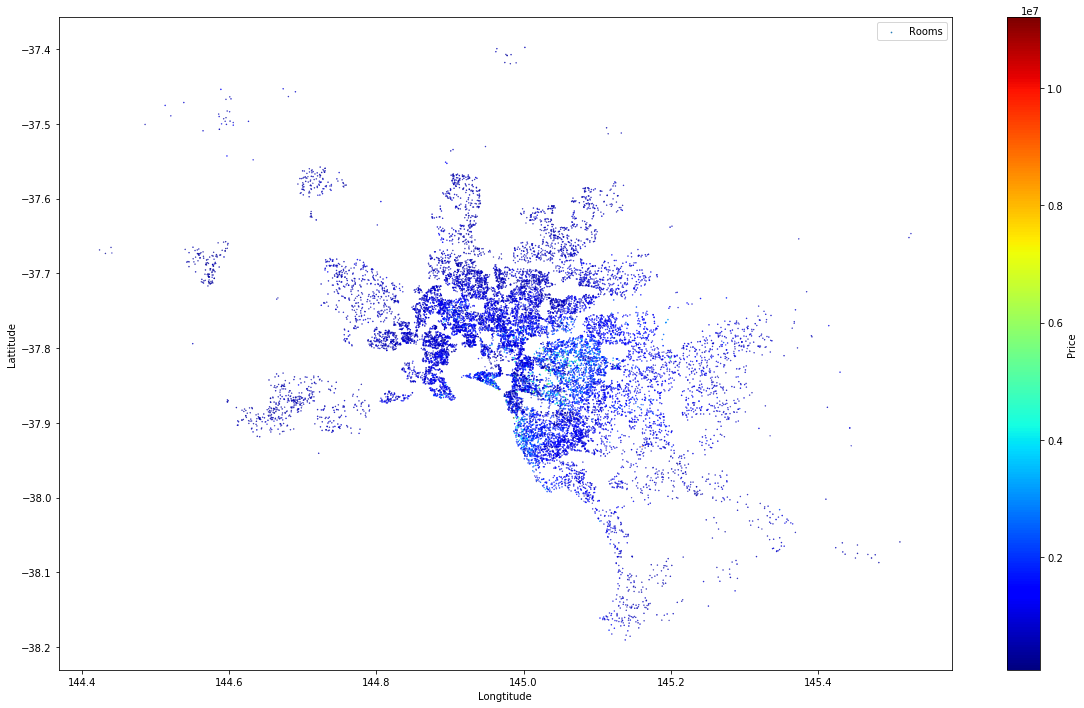

In [12]:
ax = df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=1,
    s=df["Rooms"]/20, label="Rooms", figsize=(20,12),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='Longtitude', ylabel='Lattitude')
plt.legend()

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.466872
Bedroom2         0.432851
Bathroom         0.430021
Car              0.201628
Longtitude       0.200019
BuildingArea     0.096669
Postcode         0.044286
Landsize         0.033885
Propertycount   -0.058328
Distance        -0.211904
Lattitude       -0.217219
YearBuilt       -0.331267
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108c943d0>,
      dtype=object)

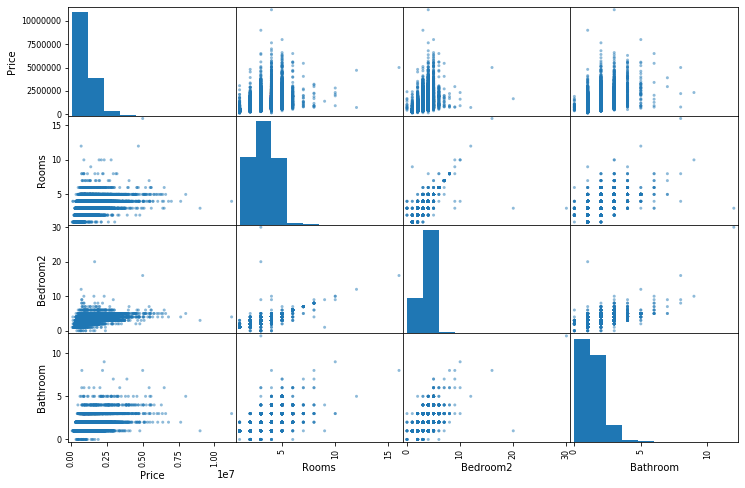

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2",
              "Bathroom"]
scatter_matrix(df[attributes], figsize=(12, 8))

[0, 50, 0, 13000000]

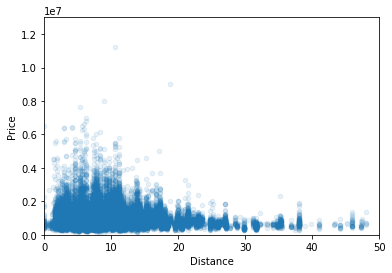

In [16]:
df.plot(kind="scatter", x="Distance", y="Price",
             alpha=0.1)
plt.axis([0, 50, 0, 13000000])

[0, 50, 0, 13000000]

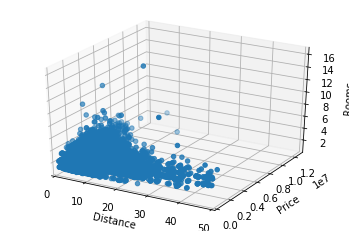

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = df["Distance"]
ys = df["Price"]
zs = df["Rooms"]
ax.scatter(xs, ys, zs)

ax.set_xlabel('Distance')
ax.set_ylabel('Price')
ax.set_zlabel('Rooms')

plt.axis([0, 50, 0, 13000000])

In [49]:
df.drop(['Method', 'SellerG', 'CouncilArea', 'Regionname', 'Distance', 'Postcode', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Suburb', 'Date', 'Address', 'Bathroom'], axis=1)

,Rooms,Type,Price,Bedroom2,Lattitude,Longtitude
26244,4,h,1028000.0,4.0,-37.92855,145.17383
13016,3,h,657000.0,3.0,-37.73970,145.05130
10342,2,u,371000.0,2.0,-37.75420,145.01000
19142,3,h,NaN,3.0,-37.74592,145.07448
11241,3,h,640000.0,3.0,-37.71110,144.96640
...,...,...,...,...,...,...
27860,5,h,3525500.0,5.0,-37.83350,145.04840
13446,3,h,NaN,3.0,-37.83480,144.93660
12989,2,u,700000.0,NaN,NaN,NaN
25213,4,h,570000.0,4.0,-37.58944,145.08298


In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [86]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [88]:
dff = DataFrameImputer().fit_transform(df)

In [89]:
print(dff)

                   Suburb               Address  Rooms Type         Price  \
26244            Mulgrave            8 Lotus Cr      4    h  1.028000e+06   
13016  Heidelberg Heights       79 Outhwaite Rd      3    h  6.570000e+05   
10342           Thornbury        4/77 Pender St      2    u  3.710000e+05   
19142             Rosanna        17 Greville Rd      3    h  1.050927e+06   
11241             Fawkner           84 Lynch Rd      3    h  6.400000e+05   
...                   ...                   ...    ...  ...           ...   
27860       Hawthorn East         8 Campbell Gr      5    h  3.525500e+06   
13446      Port Melbourne         149 Albert St      3    h  1.050927e+06   
12989       Hawthorn East  310/96 Camberwell Rd      2    u  7.000000e+05   
25213              Mernda       45 Cassinias Gr      4    h  5.700000e+05   
3400               Coburg       1 Shaftsbury St      4    h  9.900000e+05   

      Method        SellerG        Date  Distance  Postcode  ...  Bathroom 

In [36]:
imputer.statistics_

array([ 3.0000000e+00,  8.7100000e+05,  1.0300000e+01,  3.1030000e+03,
        3.0000000e+00,  2.0000000e+00,  2.0000000e+00,  5.2100000e+02,
        1.3600000e+02,  1.9700000e+03, -3.7807180e+01,  1.4500806e+02,
        6.7630000e+03])

In [37]:
housing_num.median().values

array([ 3.0000000e+00,  8.7100000e+05,  1.0300000e+01,  3.1030000e+03,
        3.0000000e+00,  2.0000000e+00,  2.0000000e+00,  5.2100000e+02,
        1.3600000e+02,  1.9700000e+03, -3.7807180e+01,  1.4500806e+02,
        6.7630000e+03])

In [92]:
df_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(df.index.values))

In [93]:
df_cat = df['Type']

In [94]:
df_cat_encoded, df_categories = df_cat.factorize()
df_cat_encoded[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [95]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
df_cat_1hot = encoder.fit_transform(df_cat_encoded.reshape(-1,1))
df_cat_1hot

<31371x3 sparse matrix of type '<class 'numpy.float64'>'
	with 31371 stored elements in Compressed Sparse Row format>

In [98]:
df_cat_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [99]:
df_categories

Index(['h', 'u', 't'], dtype='object')

In [102]:
df_cat_1hot

<31371x3 sparse matrix of type '<class 'numpy.float64'>'
	with 31371 stored elements in Compressed Sparse Row format>

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = ["Rooms", "Price", "Bedroom2", "Lattitude","Longtitude"]
cat_attribs = ["Type"]



num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(dff)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Mulgrave'